# <font color=indigo>Prediction of Compressive Strength of Concrete</font>

##  <font color=green>Introduction</font>

   >Concrete is the most important material in civil engineering. The strength of the concrete shows the ability of the structure to withstand various loads. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
   
   - The conventional process of testing the compressive strength of concrete involves casting several cubes for the respective grade (M10, M15 etc.) and observing the strength of the concrete over a period of time ranging from 7 to 28 days.

   - Various combinations of the components of concrete are selected and cubes for each combination are casted and its strength at 1, 3, 7, 14 and 28 days is noted down.

   - This is a time consuming and rather tedious process.
   
   Hence, to conserve time and energy, I decided to use my domain knowledge and apply it to data science to predict the compressive strength of concrete given various factors effecting it.
   
## <font color=green>Aim</font>
   
   >**This project aims to predict the compressive strength of concrete with maximum accuracy and minimum error, for various quantities of constituent components as the input.**
   
## <font color=green>Data description</font>

  >Dataset is obtained from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
  
 - Number of instances (observations): 1030                  
 - Number of Attributes: 9 
 
      - **8 quantitative input variables:**
          1. Cement
          2. Blast Furnace Slag
          3. Fly Ash
          4. Water
          5. Superplasticizer
          6. Coarse Aggregate
          7. Fine Aggregate
          8. Age (in days)
          
           All features above except age are in kg/m3
               
      - **1 quantitative output variable:** 
      
          Concrete Compressive Strength (Mpa)


## <font color=darkslateblue>Importing libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <font color=darkslateblue>Loading Datasets</font>

In [2]:
df = pd.read_excel('Concrete_Data.xls')
df.shape

(1030, 9)

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Changing column names

In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
column_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate',
                'Age', 'CC_strength']
df.columns = column_names
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CC_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## <font color=darkslateblue>Exploratory Data Analysis (EDA)</font>

### Feature Analysis

In [6]:
df1 = df.copy()
df1.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
CC_strength           0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   CC_strength         1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df1.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CC_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


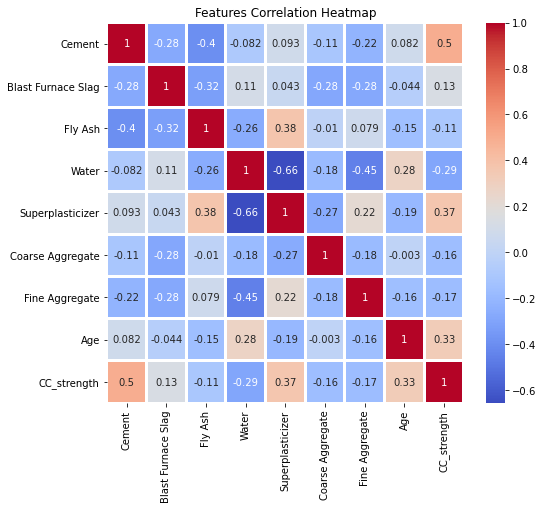

In [9]:
plt.figure(figsize = (8,7))
sns.heatmap(df1.corr(), annot = True, cmap ='coolwarm', linewidths=2)
plt.title("Features Correlation Heatmap")
plt.show()

#### Observations

   - Our target seems to be highly correlated with **Cement** followed by **Superplasticizer**, **Age**, and **Water**
    
    
   - Water and Superplasticizer, Water and Fine Aggregate are highly correlated too.
     
     
   - There is also a fair correlation between Flyash and Superplasticizer

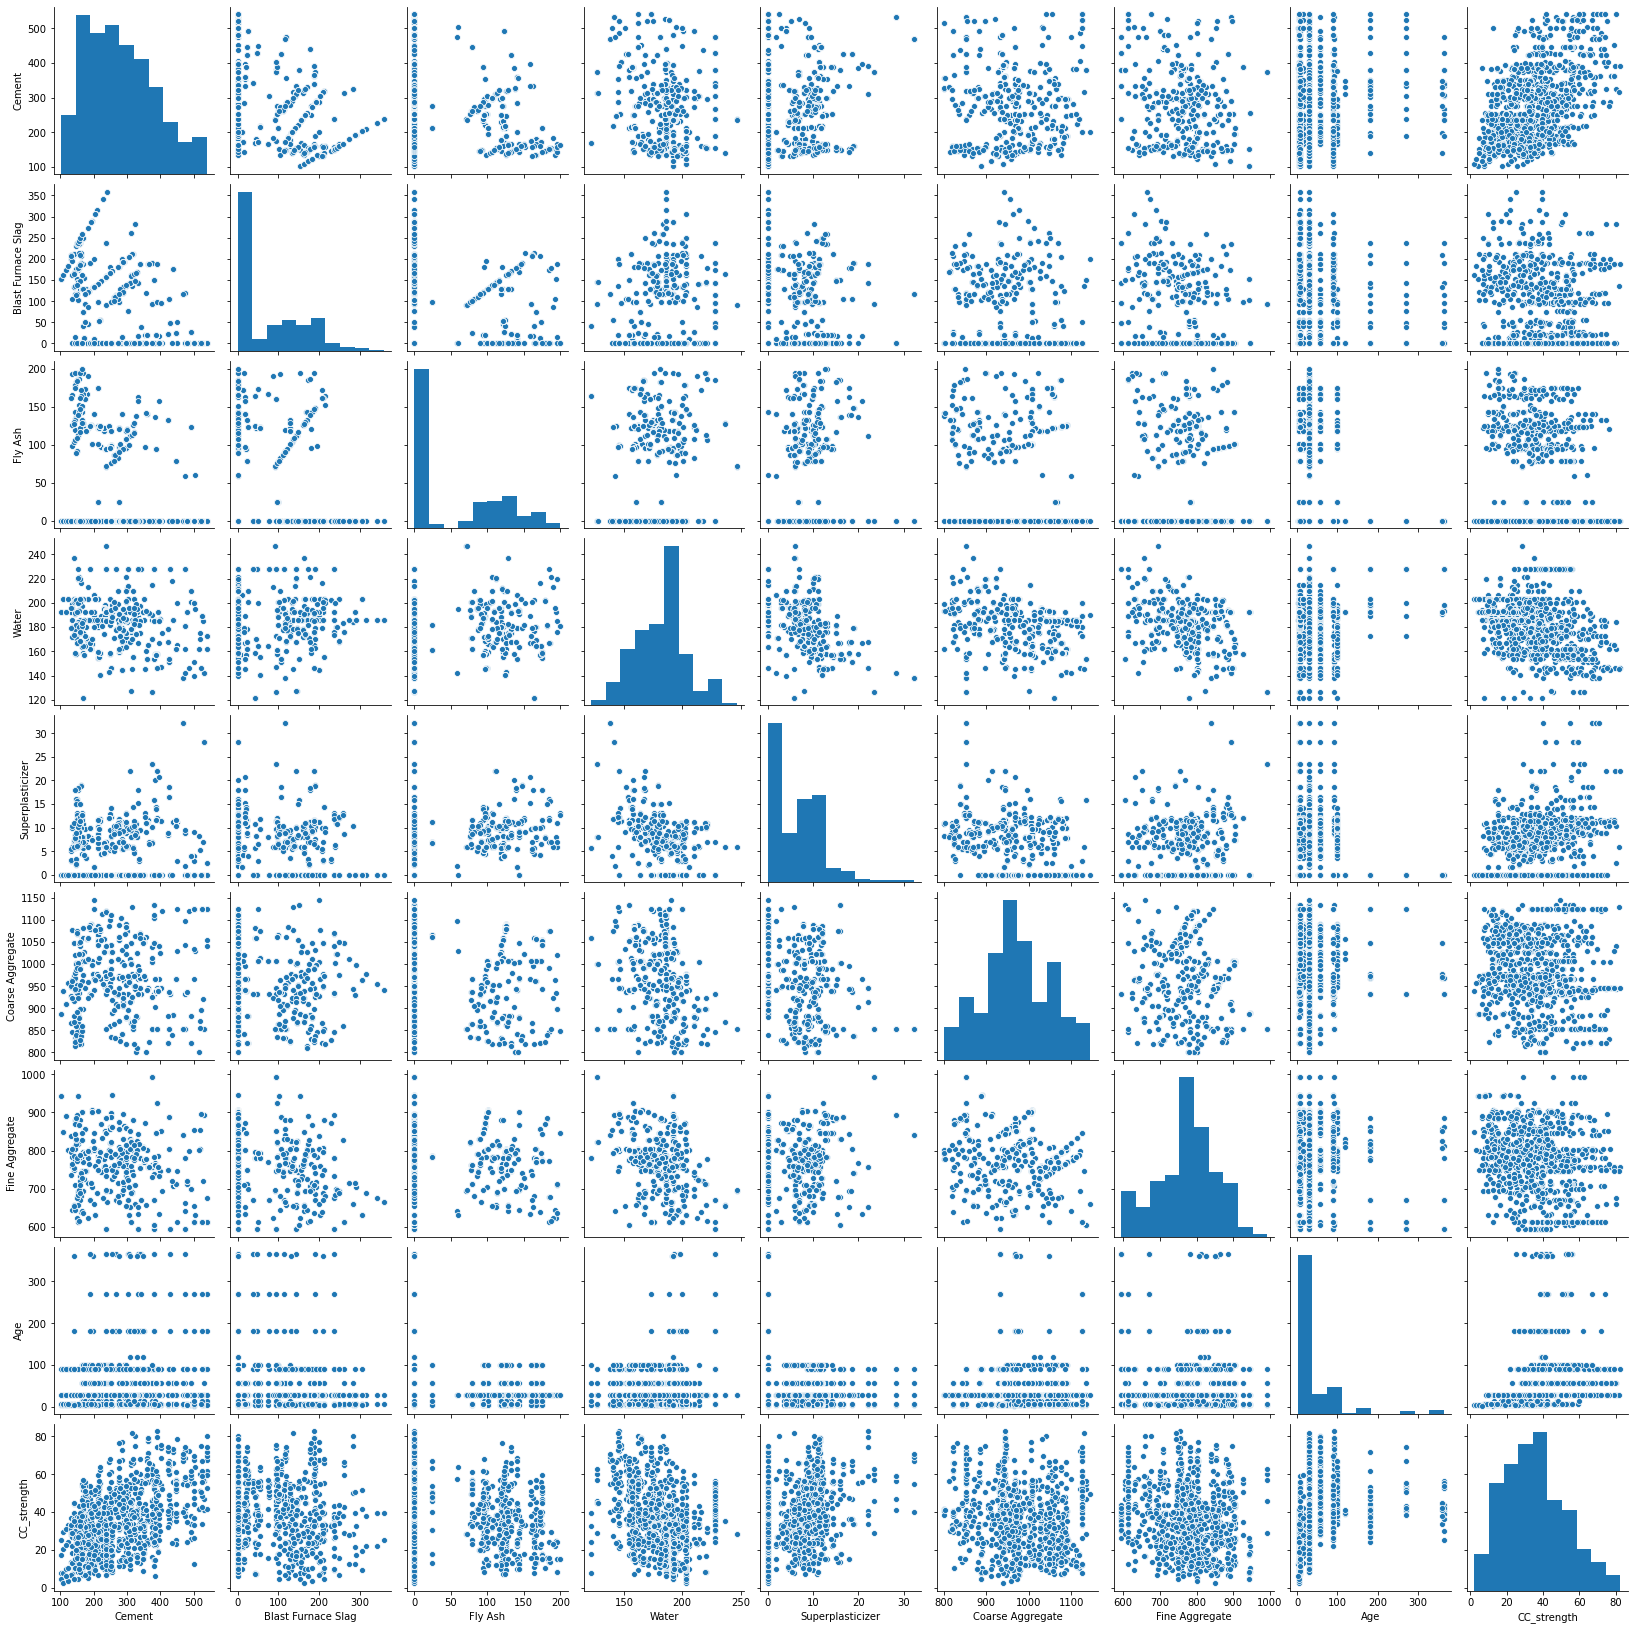

In [10]:
sns.pairplot(df1)
plt.show()

Blast Furnace Slag and Fly Ash seem to have very high zero values. This shows that most of the test were done considering a basic mix for concrete 

In [11]:
df1['Age'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
#Grouping CC_strength by Age
grouped = df1.groupby('Age')
grouped['CC_strength'].agg(np.mean)

Age
1       9.452716
3      18.981082
7      26.050623
14     28.751038
28     36.748480
56     51.890061
90     40.480809
91     69.806938
100    47.668780
120    39.647168
180    41.730376
270    51.272511
360    40.696895
365    43.557843
Name: CC_strength, dtype: float64

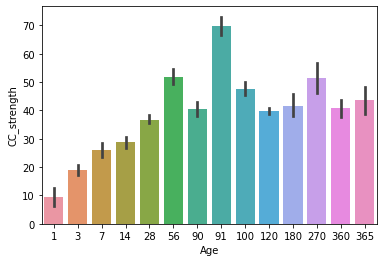

In [14]:
sns.barplot(x=df1.Age, y=df1.CC_strength)
plt.show()

As seen above, there is a gain of strength beyond 28 days. The quantum of increase depends upon the grade and type of cement, curing and environmental conditions, etc. The design is normally based on 28 days characteristic strength of concrete unless specified otherwise

### Feature Engineering

#### Water-cement ratio 

The ratio of the weight of water to the weight of cement is called Water/Cement ratio. It is the most important factor for gaining the strength of concrete. The lower w/c ratio leads the higher strength of concrete. Generally, the water/cement ratio of 0.45 to 0.60 is used.Too much water leads to segregation and voids in concrete. Water/Cement ratio is inversely proportional to the strength of concrete. When the w/c ratio is increased the strength of concrete gets decreased and when w/c ratio is decreased then the strength of concrete increases.

To understand this better, a plot compressive strength considering cement, water and age is plotted.

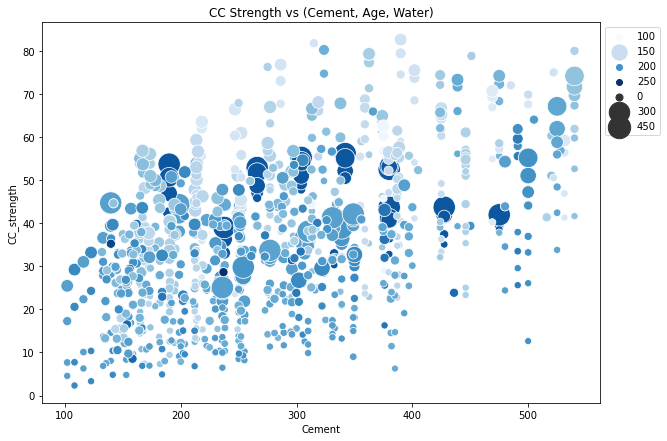

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_strength", x="Cement", hue=df1.Water.tolist(), size=df1.Age.tolist(), palette = 'Blues', 
                data=df1, ax=ax, sizes=(50, 500))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

Higher the age of the mixture, larger the size of the plot points.

The bluer the color, the more water the mixture contains.

#### Observations
   - We see that compressive strength increases upto a particular age and continues to have the same value.
   - The values of x increase with y showing there is direct proprtionality between Cement and comressive strength.
   - There clearly seems to be a relation between water and cement because as the medium amount of cement and water give the highest values of compressive strength
   - This leads to the new feature water-cement ratio.

In [16]:
df2 = df1.copy()
df2['wc_ratio'] = df2['Water']/df2['Cement']
df2.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CC_strength,wc_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.3
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.3


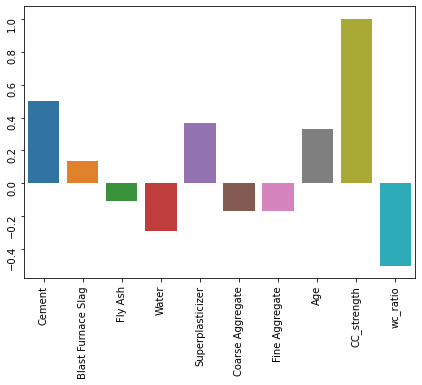

In [17]:
#checking correlation
plt.figure(figsize = (7,5))
ax = sns.barplot(df2.corrwith(df2.CC_strength).index, df2.corrwith(df2.CC_strength))
ax.tick_params(labelrotation = 90)

## <font color=darkslateblue>Splitting features and target</font>

In [18]:
X = df2.drop('CC_strength', axis = 1)       
y = df2.CC_strength
print(X.shape)
print(y.shape)

(1030, 9)
(1030,)


In [19]:
X.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,wc_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.3
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.3


p-values for the features look good which allow to further proceed with the model building process.

### Splitting the dataset into test and train 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 9)
(206, 9)
(824,)
(206,)


### Scaling features

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## <font color=darkslateblue>Model Building</font>

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Linear Regression

In [24]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.5611878994812499

In [25]:
#testing for scaled features
LR2 = linear_model.LinearRegression()
LR2.fit(X_train_sc, y_train)
LR2.score(X_test_sc, y_test)

0.5611878994812498

### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(X_train,y_train)
rd.score(X_test, y_test)

0.5605761824775309

In [27]:
#testing for scaled features
rd2 = Ridge()
rd2.fit(X_train_sc,y_train)
rd2.score(X_test_sc, y_test)

0.5622348691389161

In [28]:
rd3 = Ridge(alpha =7)
rd3.fit(X_train_sc,y_train)
rd3.score(X_test_sc, y_test)

0.5665791745244264

### Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
ls.score(X_test, y_test)

0.5536036386626388

In [30]:
ls2 = Lasso()
ls2.fit(X_train_sc,y_train)
ls2.score(X_test_sc, y_test)

0.5283131456774701

### Support Vector Regression

In [31]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train_sc,y_train)
svr_reg.score(X_test_sc, y_test)

0.6283964828504365

### Decision Tree Regressor 

As there are a lot of zeros in some of the features visible from their distributions in the pairplot plotted above, decision tree regressor would help build trees based on some conditions on features which could improve performance for the data.

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)
dt_reg.score(X_test,y_test)

0.8196295128974225

The decision tree regressor seems to give a good accuracy. It means an ensemble of it would increase the accuracy considerably.

### Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg.fit(X_train,y_train)
rf_reg.score(X_test,y_test)

0.8865304653952717

As expected, the ensemble Random Forest regressor has given the best accuracy, untill now. 

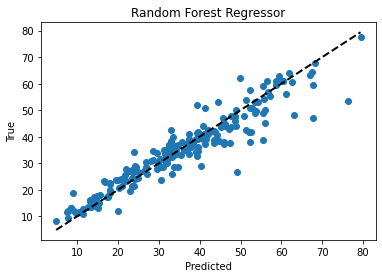

In [34]:
plt.scatter(y_test, rf_reg.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

The closer the points are to the balck line, the better the model is.

### XGBoost

In [35]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg.score(X_test,y_test)

0.914645151478408

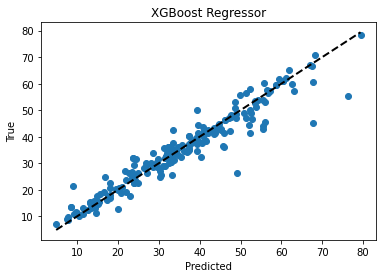

In [36]:
plt.scatter(y_test, xgb_reg.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Regressor")
plt.show()

## <font color=darkslateblue>Cross Validation</font>

#### XGBoost Model 

In [37]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_reg, X = X_train,y = y_train, cv = 4)
print("Cross validation accuracy of XGBoost model = ", cross_validation)
print("\nCross validation mean accuracy of XGBoost model = ", cross_validation.mean())

Cross validation accuracy of XGBoost model =  [0.94025344 0.85693797 0.91989551 0.94745208]

Cross validation mean accuracy of XGBoost model =  0.9161347499955244


#### Random forest Model

In [38]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = rf_reg, X = X_train,y = y_train, cv = 4)
print("Cross validation accuracy of Random forest model = ", cross_validation)
print("\nCross validation mean accuracy of Random forest model = ", cross_validation.mean())

Cross validation accuracy of Random forest model =  [0.92046316 0.87401921 0.90415294 0.91199313]

Cross validation mean accuracy of Random forest model =  0.9026571093653134


The cross validation score suggests that there has not been much of overfitting for the random forest and xgboost models which have provided the maximum ccuracy among all the models.

## <font color=darkslateblue>Comparision of models</font>

In [39]:
models1 = [ls, svr_reg, dt_reg, rf_reg, xgb_reg]
names1 = ["Lasso Regression", "Support Vector Regression", "Decision Tree Regressor", "Random Forest Regressor", 
         "XGBoost Regressor"]

RMSEs1 = []
for model in models1:
    RMSEs1.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
MAEs1 = [] 
for model in models1:
    MAEs1.append(mean_absolute_error(y_test, model.predict(X_test)))
    
R2s1 = []
for model in models1:
    R2s1.append(r2_score(y_test, model.predict(X_test)))
    
x = np.arange(len(names1)) 

results = pd.DataFrame({"Root Mean Squared Error":RMSEs1, "Mean Absolute Error": MAEs1, "R square": R2s1, "Algorithm": names1})
results

,Root Mean Squared Error,Mean Absolute Error,R square,Algorithm
0,10.232159,8.085815,0.553604,Lasso Regression
1,15.407321,12.425964,-0.012140,Support Vector Regression
2,6.504137,4.104060,0.819630,Decision Tree Regressor
3,5.158775,3.486732,0.886530,Random Forest Regressor
4,4.474258,2.798996,0.914645,XGBoost Regressor


The Support Vector model clearly does not provide with better results. Hence, is removed from further comparisions.

In [40]:
models = [ls, dt_reg, rf_reg, xgb_reg]
names = ["Lasso Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"]

RMSEs = []
for model in models:
    RMSEs.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    
MAEs = [] 
for model in models:
    MAEs.append(mean_absolute_error(y_test, model.predict(X_test)))
    
R2s = []
for model in models:
    R2s.append(r2_score(y_test, model.predict(X_test)))
    
x = np.arange(len(names)) 

results = pd.DataFrame({"Root Mean Squared Error":RMSEs, "Mean Absolute Error": MAEs, "R square": R2s, "Algorithm": names})

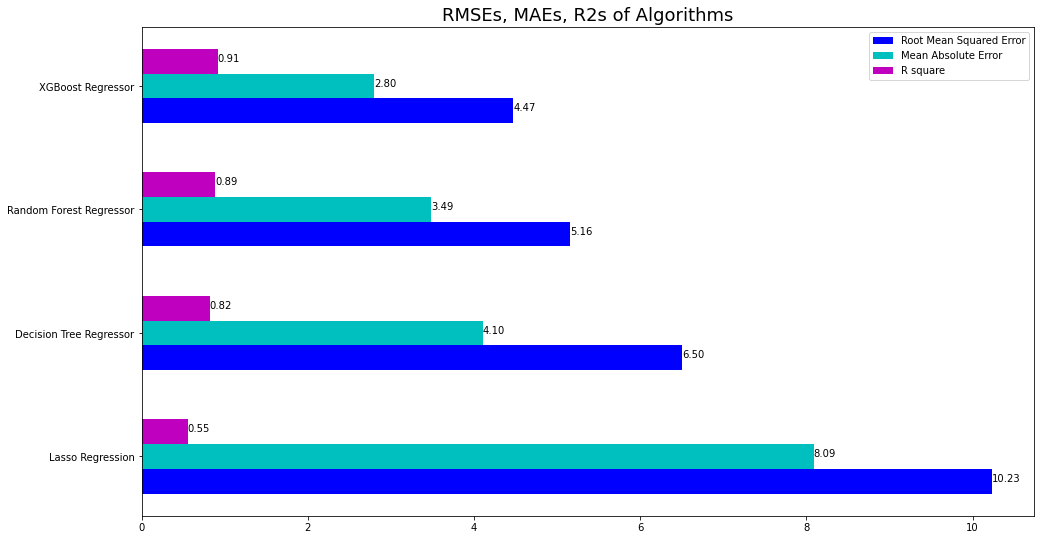

In [43]:
plt.figure(figsize=(16,9))
 
names_index = np.arange(len(names))
width = 0.2

plt.barh(names_index, results['Root Mean Squared Error'], width , color = "b",
        label = 'Root Mean Squared Error') 
 
plt.barh(names_index + width,results['Mean Absolute Error'], width , color = "c",
        label ='Mean Absolute Error') 

plt.barh(names_index + width + width, results['R square'], width , color = "m",
        label ='R square') 
 
plt.yticks(names_index + width, names)#to get values instead of 1,2,3 in regressions' place
plt.title("RMSEs, MAEs, R2s of Algorithms", fontsize = 18)

for index, value in enumerate(results['Root Mean Squared Error']):
    plt.text(value, index, '{:.2f}'.format(value))

for index, value in enumerate(results['Mean Absolute Error']):
    plt.text(value, index+width, '{:.2f}'.format(value))

for index, value in enumerate(results['R square']):
    plt.text(value, index+width+width, '{:.2f}'.format(value))

plt.legend()
plt.show()

The **XGBoost** model provides the minimum Root Mean Square Error of **4.47** , Mean Absolute Error of **2.8** and maximum R square of **0.91**. So it is clear that XGBoost is the best model for the data. 

## <font color=darkslateblue>Saving the model</font> 

In [44]:
# Pickle
import pickle

In [45]:
# save model
pickle.dump(xgb_reg, open('compressive_strength.pickle', 'wb'))

In [46]:
# load model
compressive_strength_model = pickle.load(open('compressive_strength.pickle', 'rb'))

In [47]:
# predict the output to check the pickle
y_pred = compressive_strength_model.predict(X_test)
comparision = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
comparision.head(2)

,actual,predicted
34,53.692254,51.019218
33,42.131120,42.452145
